In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv('./Datasets/student_info.csv')

In [111]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [113]:
df['study_hours'] = df['study_hours'].fillna(df['study_hours'].mean())

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    200 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [115]:
df.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

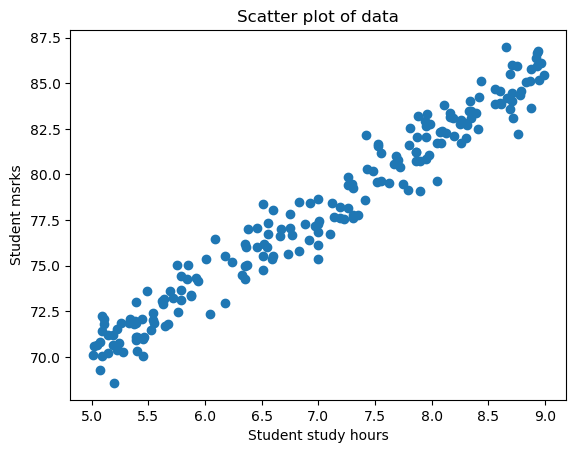

In [116]:
# Visualize dat to get insights

plt.scatter(x= df.study_hours, y = df.student_marks)
plt.xlabel('Student study hours')
plt.ylabel('Student msrks')
plt.title('Scatter plot of data')
plt.show()

In [117]:
df.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [118]:
X = df.drop("student_marks", axis= "columns")
y = df.drop("study_hours", axis= "columns")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (200, 1)
Shape of y: (200, 1)


In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 51)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (160, 1)
Shape of X_test: (40, 1)
Shape of y_train: (160, 1)
Shape of y_test: (40, 1)


- Select model and train it

In [120]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [121]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: [50.44735504]
Coefficient: [[3.93571802]]


In [122]:
y_pred = model.predict(X_test)
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [123]:
import joblib
joblib.dump(model, "student_mark_predictor_model.pkl")

['student_mark_predictor_model.pkl']

In [124]:
model = joblib.load("student_mark_predictor_model.pkl")

In [125]:
y_pred1 = model.predict(X_test)

In [126]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_pred1)

1.0

<Axes: xlabel='study_hours', ylabel='student_marks'>

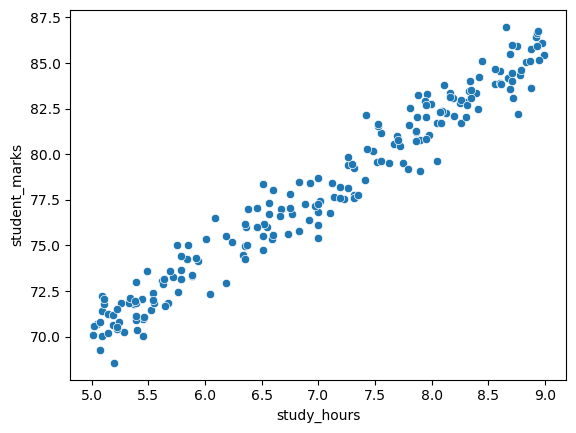

In [127]:
sns.scatterplot(x = df['study_hours'], y = df['student_marks'])